### Import Lib

In [34]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import img_to_array
from numpy import expand_dims
from scipy import signal
from keras.preprocessing.image import load_img


**4.1 VGG16 MODEL PARAMETERS**

In [36]:
#Read image
img = load_img('pic.jpg', target_size=(224, 224))
# img = cv2.imread("pic.jpg")
model = VGG16()
model.summary()
kernels,biases = model.layers[1].get_weights()
model.layers[1].get_config()

img = img_to_array(img)
img = expand_dims(img,axis=0)
img_ready = preprocess_input(img)

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________


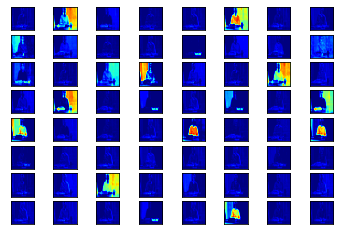

In [39]:
model = Model(inputs=model.inputs, outputs=model.layers[1].output)
model.summary()

feature_maps = model.predict(img_ready)

square = 8
ix = 1
for _ in range(square):
	for _ in range(square):
		ax = plt.subplot(square, square, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		plt.imshow(feature_maps[0, :, :, ix-1], cmap='jet')
		ix += 1
plt.show()

**4.2 IMAGE PREPARATION (From Scratch)**

In [40]:
#Read Image
img = cv2.imread('pic.jpg')
img_prep = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

img_prep.resize(224,224)
# plt.imshow(img_prep)
# plt.show()

**4.3 CONV2D()**

In [ ]:
# Operate 2D convolution to image from 4.2(ImgBGR)
    # Image convolution with kernel
# img_result[:,:,0] = signal.convolve2d(imgBGR[:,:,0], kernels[:,:,0,i],mode='same',boundary='fill',fillvalue=0)